In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.optimizers import RMSprop, SGD
from keras import backend as K
from keras.regularizers import WeightRegularizer, l1, l2, activity_l2
from sklearn.manifold import TSNE
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [4]:
raw = pd.DataFrame.from_csv('data/pseudomonas.tsv', sep='\t').transpose()

In [5]:
y = np.array(raw)
for i in range(raw.shape[0]):
    y[i,:] = y[i,:] / np.sum(y[i,:])
x = preprocessing.scale(y)

In [6]:
X_arr = np.array(x)
#X_reduced = TruncatedSVD(n_components=500, random_state=0).fit_transform(X_arr)
tsneMOD = TSNE(n_components=2, random_state=0, verbose=1)
#np.set_printoptions(suppress=True)
X_tsne = tsneMOD.fit_transform(X_arr)
tsneMOD.get_params()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 950 / 950
[t-SNE] Mean sigma: 20.071101
[t-SNE] Error after 100 iterations with early exaggeration: 0.604656
[t-SNE] Error after 200 iterations: 0.497741


{'angle': 0.5,
 'early_exaggeration': 4.0,
 'init': 'random',
 'learning_rate': 1000.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 30,
 'perplexity': 30.0,
 'random_state': 0,
 'verbose': 1}

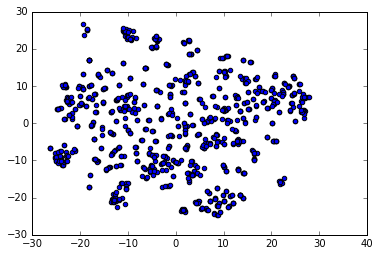

In [8]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [ ]:
sklearn.cluster.KMeans(n_cluster=50, verbose=1) # need to work on this

In [7]:
lm3 = linear_model.LinearRegression()
lm3.fit(X_tsne, preprocessing.scale(np.array(raw)))
print lm3.score(X_tsne, preprocessing.scale(np.array(raw)))

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.0931010787971
